<a href="https://colab.research.google.com/github/nieyangfei/EGG_Big_Data/blob/main/EEG_Big_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This is the project of Big Data and Machine Learning. This paper is about Electroencephalogram (EEG)-based emotion recognition. The code is proposed to do these procedure in sequnce.


1.   Data Preparation. Doing this to know what the SEED-IV is like.
2.   SVM classification. This model is easy, at least we can get the passed mark.
3.   CNN classificaiton. This modle is hard, we can do it if time allows.
4.   K Means. We are curious what if we use non labeled network?
4.   Other morden networks. This is hard because we need to find the mordern and special networks. I do not think this is plausible.
## Abbreviations
PSD: Power Spectral Density.

PCA: Principal Component Analysis.

PSD: Power Spectral Density.

DE: Differential Entropy.

LDS: linear dynamical system.




# Data Preparation
This will show how the data is.







## File overview by heirachy
1.   **eeg_feature_smooth**. The smooth data of EGG.
Including three sessions, each session has 15 subjects, each subject has two groups consists of DE & PSD feature extract method, each group has two filter group consists of LDS & moving average filters, each filter group has 24 labled variables, each variable has information about 62 electrodes, several time windows, 5 frequency bands.
2.   **eeg_raw_data**. Raw EGG data which has 1000 Hz sampling rate using the ESI NeuroScan System.
3.   **eye_feature_smooth**. The smooth data of eye. The top features are same as eeg_feature_smooth, but the each variable consists of 12 features and several time windows.
4.   **eye_raw_data**. Raw eye data which captured by SMI ETG eye-tracking glasses.
5.   **Channel Order.xlsx**. The EGG electrod name and order in eeg_feature_smooth & eeg_raw_data.
6.   **channel_62_pos**. The 62 EGG channels on the head location. The specific data and head location map does not show.
7.   **ReadMe.txt**. Introduction of the dataset, including copyright, sample gender, label, reference and contact information.
8.   **SEED-IV_stimulation.xlsx**. The video stimulation of the people, which contains video clip of three experiments.
9.   **SEED-IV_subject_info.txt**. The subject gengder, including nine female and six male.

In the Machine learning, this paper will only use eeg_feature_smooth, eye_feature_smooth, ReadMe.txt, Channel Order.xlsx as my input data. Other data in SEED_IV are kinds of middle data that do be used in this paper.

The data is not huge and might currently the author is skeptical about the training result. Fistly, show the EGG and eye data into figures for initial analyze.

As the origin paper says, DE extraction and LDS filter has the best performance. So, this paper tackles with DE feature extraction with LDS filter first. Original paper says they use T7, T8, FT7, FT8, TP7,and TP8, which index in mat are 24, 32, 15, 23, 33, and 41.

In [2]:
# remove all variables
rm(list = ls())
# optional, free memory
gc()
# Install
if(!require(R.matlab)) install.packages("R.matlab")
if(!require(googledrive)) install.packages("googledrive")
if(!require(devtools)) install.packages("devtools")

# Library / Link
library(R.matlab)
library(googledrive)
library(devtools)

#Initialization
drive_auth()


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,658796,35.2,1454454,77.7,1454454,77.7
Vcells,1223992,9.4,8388608,64.0,1975128,15.1


Loading required package: R.matlab

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘R.matlab’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’


Loading required package: googledrive

Loading required package: devtools

Loading required package: usethis

R.matlab v3.7.0 (2022-08-25 21:52:34 UTC) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen


Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=eb144ebabedf0667bb52433a94f9c1c7&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVZHelIxQXRkN2dFNVF5Mk1henFSMjg0V1NPbFlsVEI1bG1CVmJaX0haUU5STFYtSmdKMkZHTW5Fd1NQNy1aVWtwNFBQZyIsInN0YXRlIjoiZWIxNDRlYmFiZWRmMDY2N2JiNTI0MzNhOTRmOWMxYzcifQ==


In [33]:
## I want to read and show EGG & eye data. To see how it is?


# Read mat file
EGG_sample_file_path_name <- "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"
print(EGG_sample_file_path_name)
# Find the file in my Google Drive and see it
EGG_sample_file <- drive_get(EGG_sample_file_path_name)
head(EGG_sample_file)
drive_download(EGG_sample_file, path = "1_20160518.mat", overwrite = TRUE)
sample <- readMat("1_20160518.mat")

de_LDS1 <- sample$de.LDS1
T7 <- de_LDS1[24, , ]
# print(T7)
# plot(T7)

# matplot(T7, pch = 19, col = 1:5,
#         main = "T7 Columns (5 band figure)",
#         xlab = "Index", ylab = "Value")
# legend("topright", legend = c("1-4Hz", "4-8Hz", "8-14Hz", "14-31Hz","31-50Hz"),
#        col = 1:5, pch = 19)

a = sample$de.LDS4[24, , 1]
# a = as.vector(a)
print("a")
print(a)

# session1_label = [1,2,3,0 ...], let us see differenct emotions in T7 delta band.
subject1 = c(sample$de.LDS4[24, , 1], sample$de.LDS1[24, , 1], sample$de.LDS2[24, , 1], sample$de.LDS3[24, , 1])
print("subject1")
print(subject1)



[1] "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"


✔ The input `path` resolved to exactly 1 file.



name          
1 1_20160518.mat
  path                                                              
1 ~/Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat
  id                                drive_resource                   
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1r64a1aynHlpqQyhkNh6w1dYVUVQOmpUv
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>             <NA>           <NA>   <NA>   <NA>  <NA>            
1 drive#permission anyoneWithLink anyone writer FALSE drive#permission
  <NA>                 <NA> <NA>                   <NA>  <NA>       
1 14809535534033574514 user nieyangfeigo@gmail.com owner yangfei nie
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA> 
1 FALSE FALSE drive FALSE FALSE FALSE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE
  <NA> <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> 
1 TRUE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE FALSE TRUE TRUE TRUE FALSE
  <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> <NA> <NA>           <NA>                
1 TRUE FALSE FALSE TRUE TRUE TRUE TRUE TRUE anyoneWithLink 14809535534033574514
  <NA>  <NA> <NA>  <NA>  <NA>  <NA>  <NA>      
1 FALSE TRUE FALSE FALSE FALSE FALSE drive#file
  <NA>                              <NA>           <NA>                    
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1_20160518.mat application/octet-stream
  <NA>  <NA>  <NA>  <NA>
1 FALSE FALSE FALSE 4   
  <NA>                                                                            
1 https://drive.google.com/uc?id=1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ&export=download
  <NA>                                                                               
1 https://drive.google.com/file/d/1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ/view?usp=drivesdk
  <NA>                                                                           
1 https://drive-thirdparty.googleusercontent.com/16/type/application/octet-stream
  <NA>  <NA> <NA> <NA>                     <NA>                    
1 FALSE 0    TRUE 2025-10-17T21:46:09.595Z 2025-10-17T21:46:09.595Z
  <NA>                     <NA>                     <NA> <NA> <NA> <NA> <NA> 
1 2018-11-15T15:04:54.000Z 2018-11-15T15:04:54.000Z TRUE TRUE TRUE TRUE FALSE
  <NA> <NA>           <NA> <NA> <NA>                            
1 TRUE 1_20160518.mat mat  mat  7861e59e376101c225e5d2cc72898d89
  <NA>                                    
1 e8d98a4cf5e108a7f5760a3faa903bba12446e8d
  <NA>                                                             <NA>   
1 0c65161c6b064276c855b1774e8a21d0e9ecf1162d1202a7c89dad9c30b19b70 7786107
  <NA>    <NA>                                                <NA>  <NA> 
1 7786107 0B1AUM7oqgWhbcW5XU0UyTEVUbnQ5aEpMR0ROYUorSEpvWmhJPQ FALSE FALSE

File downloaded:

• 1_20160518.mat <id: 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ>

Saved locally as:

• 1_20160518.mat



[1] "a"
 [1] 26.17831 26.17799 26.17820 26.17819 26.17766 26.17907 26.18145 26.18400
 [9] 26.18700 26.18895 26.18949 26.19001 26.19095 26.19121 26.19057 26.19062
[17] 26.19058 26.19080 26.18976 26.18732 26.18433 26.18228 26.18099 26.17962
[25] 26.17753 26.17668 26.17585 26.17294 26.17122 26.17060 26.17029 26.17143
[1] "subject1"
  [1] 26.17831 26.17799 26.17820 26.17819 26.17766 26.17907 26.18145 26.18400
  [9] 26.18700 26.18895 26.18949 26.19001 26.19095 26.19121 26.19057 26.19062
 [17] 26.19058 26.19080 26.18976 26.18732 26.18433 26.18228 26.18099 26.17962
 [25] 26.17753 26.17668 26.17585 26.17294 26.17122 26.17060 26.17029 26.17143
 [33] 25.80807 25.80882 25.80877 25.80916 25.80911 25.80886 25.80654 25.80432
 [41] 25.80157 25.79912 25.79780 25.79707 25.79524 25.79188 25.78727 25.78135
 [49] 25.77439 25.76779 25.76071 25.75338 25.74633 25.73796 25.72897 25.71895
 [57] 25.70800 25.69798 25.68827 25.67942 25.67033 25.66143 25.65187 25.64300
 [65] 25.63346 25.62311 25.61348 25.60263 25.

NULL


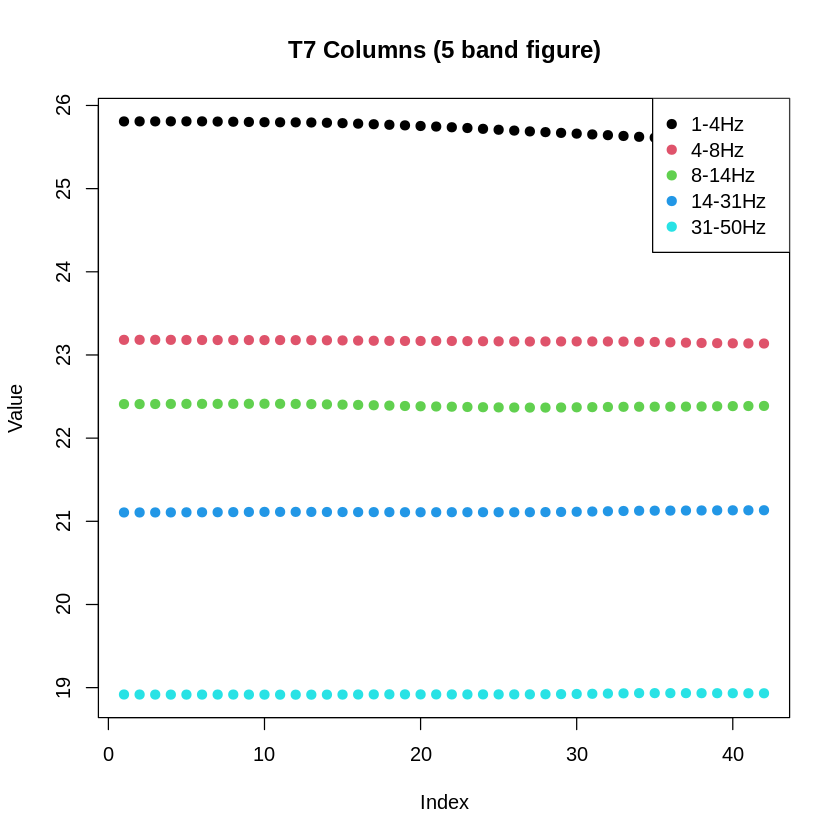